In [25]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("ESFA/dataset.csv", sep='\t', encoding = "unicode_escape", low_memory=False)

In [26]:
df.columns

Index(['SurveyscountryDESC', 'SurveyscountryID', 'SurveystartyearID',
       'SurveyDESC', 'SurveyID', 'PopulationGroupL2DESC',
       'PopulationGroupL2ID', 'ExposurehierarchyL1DESC',
       'ExposurehierarchyL1ID', 'ExposurehierarchyL2DESC',
       'ExposurehierarchyL2ID', 'ExposurehierarchyL3DESC',
       'ExposurehierarchyL3ID', 'ExposurehierarchyL4DESC',
       'ExposurehierarchyL4ID', 'ExposurehierarchyL5DESC',
       'ExposurehierarchyL5ID', 'ExposurehierarchyL6DESC',
       'ExposurehierarchyL6ID', 'ExposurehierarchyL7DESC',
       'ExposurehierarchyL7ID', 'Metrics', 'comment_Acute',
       'Comment_Acute_all', 'comment_chronic', 'comment_chronic_all',
       'con_days', 'count_days_s_pg', 'count_days_wg', 'count_subject_s_pg',
       'count_subject_wg', 'per_customer', 'avg_chronic', 'avg_chronic_rs',
       'avg_chronic_bw', 'avg_chronic_bw_rs', 'STD_CH', 'STD_CH_RS',
       'STD_CH_BW', 'STD_CH_BW_RS', 'p5_chronic', 'p5_chronic_rs',
       'p5_chronic_bw', 'p5_chronic_bw_rs'

In [33]:
col_ren = {"SurveyscountryDESC" : "survey_country",
           "SurveystartyearID" : "survey_start_year",
           "SurveyDESC": "survey_desc",
           "PopulationGroupL2DESC": "pop_group",
           "ExposurehierarchyL1DESC": "food_type_L1",
           "ExposurehierarchyL2DESC": "food_type_L2",
           "ExposurehierarchyL3DESC": "food_type_L3",
           "ExposurehierarchyL4DESC": "food_type_L4",
           "count_subject_s_pg": "pop_count",
           "count_subject_wg": "cons_count",
           "avg_chronic_bw": "mean_weight",
           "STD_CH_BW": "std_weight",
           "median_chronic_bw": "med_weight"}

df_sel = df[list(col_ren.keys())].rename(columns=col_ren)

In [34]:
df_sel.head()

,survey_country,survey_start_year,survey_desc,pop_group,food_type_L1,food_type_L2,food_type_L3,food_type_L4,pop_count,cons_count,mean_weight,std_weight,med_weight
0,Austria,2005.0,Austrian Study on Nutritional Status 2005-06,Adults,Alcoholic beverages,Alcoholic beverages,Alcoholic beverages,Alcoholic beverages,2123,4,4.741841,6.739381,1.634615
1,Austria,2005.0,Austrian Study on Nutritional Status 2005-06,Adults,Alcoholic beverages,Beer and beer-like beverage,Beer,Beer,2123,268,8.468373,5.787558,6.622807
2,Austria,2005.0,Austrian Study on Nutritional Status 2005-06,Adults,Alcoholic beverages,Beer and beer-like beverage,Beer,Lager beer,2123,4,8.468146,5.372282,7.719298
3,Austria,2005.0,Austrian Study on Nutritional Status 2005-06,Adults,Alcoholic beverages,Beer and beer-like beverage,Beer,Lager beer,2123,2,9.796627,8.242564,9.796627
4,Austria,2005.0,Austrian Study on Nutritional Status 2005-06,Adults,Alcoholic beverages,Beer and beer-like beverage,Beer-like beverages,Shandy,2123,8,9.383535,9.767373,6.597222


---
## 1. Plot in time of the consumption of Alcohol in Spain
<br />

In [40]:
df_spain = df_sel[df_sel["survey_country"] == "Spain"]
df_spain.head()

,survey_country,survey_start_year,survey_desc,pop_group,food_type_L1,food_type_L2,food_type_L3,food_type_L4,pop_count,cons_count,mean_weight,std_weight,med_weight
59137,Spain,1998.0,Food patterns of Spanish schoolchildren and ad...,Toddlers,Animal and vegetable fats and oils and primary...,Animal and vegetable fats/oils,"Vegetable fats and oils, edible",Olive oils,17,10,0.729913,0.625989,0.511739
59138,Spain,1998.0,Food patterns of Spanish schoolchildren and ad...,Toddlers,Animal and vegetable fats and oils and primary...,Animal and vegetable fats/oils,"Vegetable fats and oils, edible",Olive oils,17,3,0.257095,0.183944,0.166667
59139,Spain,1998.0,Food patterns of Spanish schoolchildren and ad...,Toddlers,Animal and vegetable fats and oils and primary...,Animal and vegetable fats/oils,"Vegetable fats and oils, edible",Seed oils,17,4,0.572327,0.170323,0.637175
59140,Spain,1998.0,Food patterns of Spanish schoolchildren and ad...,Toddlers,Animal and vegetable fats and oils and primary...,Fat emulsions and blended fats,Butter,Butter,17,2,0.173478,0.012734,0.173478
59141,Spain,1998.0,Food patterns of Spanish schoolchildren and ad...,Toddlers,Animal and vegetable fats and oils and primary...,Fat emulsions and blended fats,Margarines and similar,Traditional margarine,17,2,0.425988,0.086302,0.425988


$\large \sum_{food\_type, year} \frac{mean\_weight \cdot cons\_count}{pop\_count}$

In [53]:
df_spain_alcohol = df_spain[df_spain["food_type_L1"] == "Alcoholic beverages"].copy()
df_spain_alcohol["weight"] = df_spain_alcohol["mean_weight"] * df_spain_alcohol["cons_count"]
df_spain_alcohol["w_weight"] = df_spain_alcohol["weight"] / df_spain_alcohol["pop_count"]

df_spain_alcohol.head()

,survey_country,survey_start_year,survey_desc,pop_group,food_type_L1,food_type_L2,food_type_L3,food_type_L4,pop_count,cons_count,mean_weight,std_weight,med_weight,weight,w_weight
59244,Spain,1998.0,Food patterns of Spanish schoolchildren and ad...,Other children,Alcoholic beverages,Wine and wine-like drinks,Wine,"Wine, white",156,2,0.302507,0.217361,0.302507,0.605014,0.003878
59474,Spain,1998.0,Food patterns of Spanish schoolchildren and ad...,Adolescents,Alcoholic beverages,Wine and wine-like drinks,Wine,"Wine, red",209,1,0.140449,0.000000,0.140449,0.140449,0.000672
59475,Spain,1998.0,Food patterns of Spanish schoolchildren and ad...,Adolescents,Alcoholic beverages,Wine and wine-like drinks,Wine,"Wine, white",209,1,0.096154,0.000000,0.096154,0.096154,0.000460
59748,Spain,1999.0,Spanish Agency for Food Safety (AESAN) Survey,Adults,Alcoholic beverages,Beer and beer-like beverage,Beer,Beer,418,101,4.448947,4.423882,2.774275,449.343657,1.074985
59749,Spain,1999.0,Spanish Agency for Food Safety (AESAN) Survey,Adults,Alcoholic beverages,Beer and beer-like beverage,Beer,Lager beer,418,18,2.119616,1.442176,2.020105,38.153092,0.091275


In [67]:
df_spain_alcohol_g = (
    df_spain_alcohol
    [["survey_start_year","pop_group","w_weight"]]
    .groupby(["survey_start_year","pop_group"])
    .sum()
    .rename(columns={"w_weight":"w_weight_sum"})
)

df_spain_alcohol_g

w_weight_sum
survey_start_year pop_group                   
1998.0            Adolescents         0.007925
                  Other children      0.027148
1999.0            Adults             10.968317
2004.0            Adolescents         1.284871
                  Other children      0.010965
2009.0            Adolescents         2.498153
                  Adults              7.846335
2013.0            Adults              7.612963
                  Elderly             9.948348

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E143B0148>,
      dtype=object)

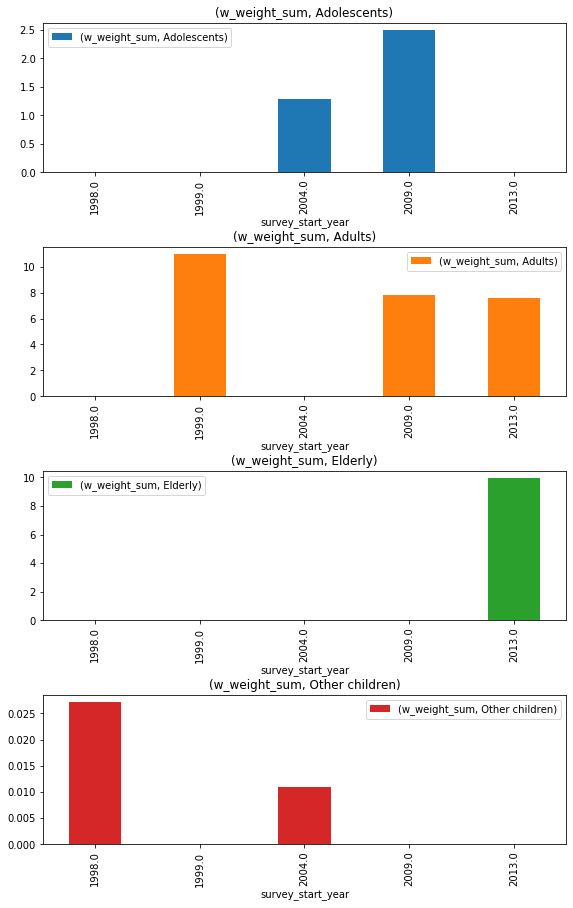

In [108]:
fig, axes = plt.subplots(4,1, figsize=(8,12))
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)


df_spain_alcohol_g.unstack(level=1).plot(kind='bar', subplots=True, ax=axes[0])

---
## 2. Plot in time of the consumption of Alcohol for chunks
<br />

In [113]:
df_sel["survey_desc"].nunique()

60

In [120]:
df_surveys_chunks = df = pd.read_csv(r"ESFA/surveys_chunks.csv", index_col=0)
df_surveys_chunks.head()

,Country,Survey,Start,End,chunk
0,Estonia,National Dietary Survey 1997,1997-01-01,1997-12-31,0
23,Sweden,Swedish National Dietary Survey - RIKSMATEN 19...,1997-06-01,1998-06-01,0
17,Ireland,North/South Ireland Food Consumption Survey,1997-06-01,1999-06-01,0
3,Spain,Food patterns of Spanish schoolchildren and ad...,1998-06-01,2000-06-01,0
4,Spain,Spanish Agency for Food Safety (AESAN) Survey,1999-06-01,2001-06-01,0


In [123]:
df_alcohol = df_sel[df_sel["food_type_L1"] == "Alcoholic beverages"].copy()
df_alcohol.head()

,survey_country,survey_start_year,survey_desc,pop_group,food_type_L1,food_type_L2,food_type_L3,food_type_L4,pop_count,cons_count,mean_weight,std_weight,med_weight
0,Austria,2005.0,Austrian Study on Nutritional Status 2005-06,Adults,Alcoholic beverages,Alcoholic beverages,Alcoholic beverages,Alcoholic beverages,2123,4,4.741841,6.739381,1.634615
1,Austria,2005.0,Austrian Study on Nutritional Status 2005-06,Adults,Alcoholic beverages,Beer and beer-like beverage,Beer,Beer,2123,268,8.468373,5.787558,6.622807
2,Austria,2005.0,Austrian Study on Nutritional Status 2005-06,Adults,Alcoholic beverages,Beer and beer-like beverage,Beer,Lager beer,2123,4,8.468146,5.372282,7.719298
3,Austria,2005.0,Austrian Study on Nutritional Status 2005-06,Adults,Alcoholic beverages,Beer and beer-like beverage,Beer,Lager beer,2123,2,9.796627,8.242564,9.796627
4,Austria,2005.0,Austrian Study on Nutritional Status 2005-06,Adults,Alcoholic beverages,Beer and beer-like beverage,Beer-like beverages,Shandy,2123,8,9.383535,9.767373,6.597222


In [125]:
df_alcohol_best = df_alcohol.merge(df_surveys_chunks[["Survey","chunk"]], left_on="survey_desc", right_on="Survey", how="inner")
df_alcohol_best.head()

,survey_country,survey_start_year,survey_desc,pop_group,food_type_L1,food_type_L2,food_type_L3,food_type_L4,pop_count,cons_count,mean_weight,std_weight,med_weight,Survey,chunk
0,Estonia,1997.0,National Dietary Survey 1997,Adults,Alcoholic beverages,Beer and beer-like beverage,Beer,Lager beer,1866,206,13.698508,11.860726,9.090909,National Dietary Survey 1997,0
1,Estonia,1997.0,National Dietary Survey 1997,Adults,Alcoholic beverages,Beer and beer-like beverage,Beer,Lager beer,1866,1,4.714286,0.000000,4.714286,National Dietary Survey 1997,0
2,Estonia,1997.0,National Dietary Survey 1997,Adults,Alcoholic beverages,Beer and beer-like beverage,Beer-like beverages,Beer-like beverages,1866,11,2.922928,1.856794,2.037662,National Dietary Survey 1997,0
3,Estonia,1997.0,National Dietary Survey 1997,Adults,Alcoholic beverages,Mixed alcoholic drinks,Cocktail drink,Cocktail drink,1866,3,4.251926,2.051787,4.925373,National Dietary Survey 1997,0
4,Estonia,1997.0,National Dietary Survey 1997,Adults,Alcoholic beverages,Unsweetened spirits and liqueurs,Liqueurs,Liqueurs,1866,12,1.575401,0.433406,1.695402,National Dietary Survey 1997,0


In [126]:
df_alcohol_best["survey_country"].unique()

array(['Estonia', 'Finland', 'Ireland', 'Netherlands', 'Spain', 'Sweden',
       'United Kingdom'], dtype=object)

In [132]:
df_alcohol_best["weight"] = df_alcohol_best["mean_weight"] * df_alcohol_best["cons_count"]
df_alcohol_best["w_weight"] = df_alcohol_best["weight"] / df_alcohol_best["pop_count"]
df_alcohol_best.head()

,survey_country,survey_start_year,survey_desc,pop_group,food_type_L1,food_type_L2,food_type_L3,food_type_L4,pop_count,cons_count,mean_weight,std_weight,med_weight,Survey,chunk,weight,w_weight
0,Estonia,1997.0,National Dietary Survey 1997,Adults,Alcoholic beverages,Beer and beer-like beverage,Beer,Lager beer,1866,206,13.698508,11.860726,9.090909,National Dietary Survey 1997,0,2821.892710,1.512268
1,Estonia,1997.0,National Dietary Survey 1997,Adults,Alcoholic beverages,Beer and beer-like beverage,Beer,Lager beer,1866,1,4.714286,0.000000,4.714286,National Dietary Survey 1997,0,4.714286,0.002526
2,Estonia,1997.0,National Dietary Survey 1997,Adults,Alcoholic beverages,Beer and beer-like beverage,Beer-like beverages,Beer-like beverages,1866,11,2.922928,1.856794,2.037662,National Dietary Survey 1997,0,32.152204,0.017231
3,Estonia,1997.0,National Dietary Survey 1997,Adults,Alcoholic beverages,Mixed alcoholic drinks,Cocktail drink,Cocktail drink,1866,3,4.251926,2.051787,4.925373,National Dietary Survey 1997,0,12.755778,0.006836
4,Estonia,1997.0,National Dietary Survey 1997,Adults,Alcoholic beverages,Unsweetened spirits and liqueurs,Liqueurs,Liqueurs,1866,12,1.575401,0.433406,1.695402,National Dietary Survey 1997,0,18.904812,0.010131


In [133]:
df_alcohol_best_g = (
    df_alcohol_best
    [["chunk","pop_group","w_weight"]]
    .groupby(["chunk","pop_group"])
    .sum()
    .rename(columns={"w_weight":"w_weight_sum"})
)

df_alcohol_best_g

w_weight_sum
chunk pop_group                    
0     Adolescents          0.007925
      Adults             104.664349
      Other children       0.583327
1     Adolescents          2.358726
      Adults              33.413033
      Elderly              4.252063
      Other children       0.762191
      Toddlers             0.033203
2     Adolescents          8.155263
      Adults              95.007687
      Elderly             76.173502
      Infants              0.030242
      Other children       0.098052
      Toddlers             0.156474
      Very elderly        36.461222
3     Adolescents          4.619598
      Adults              26.905384
      Elderly             20.605849
      Lactating women      1.125358
      Other children       0.747819
      Toddlers             0.211368

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015DF7F70A88>,
      dtype=object)

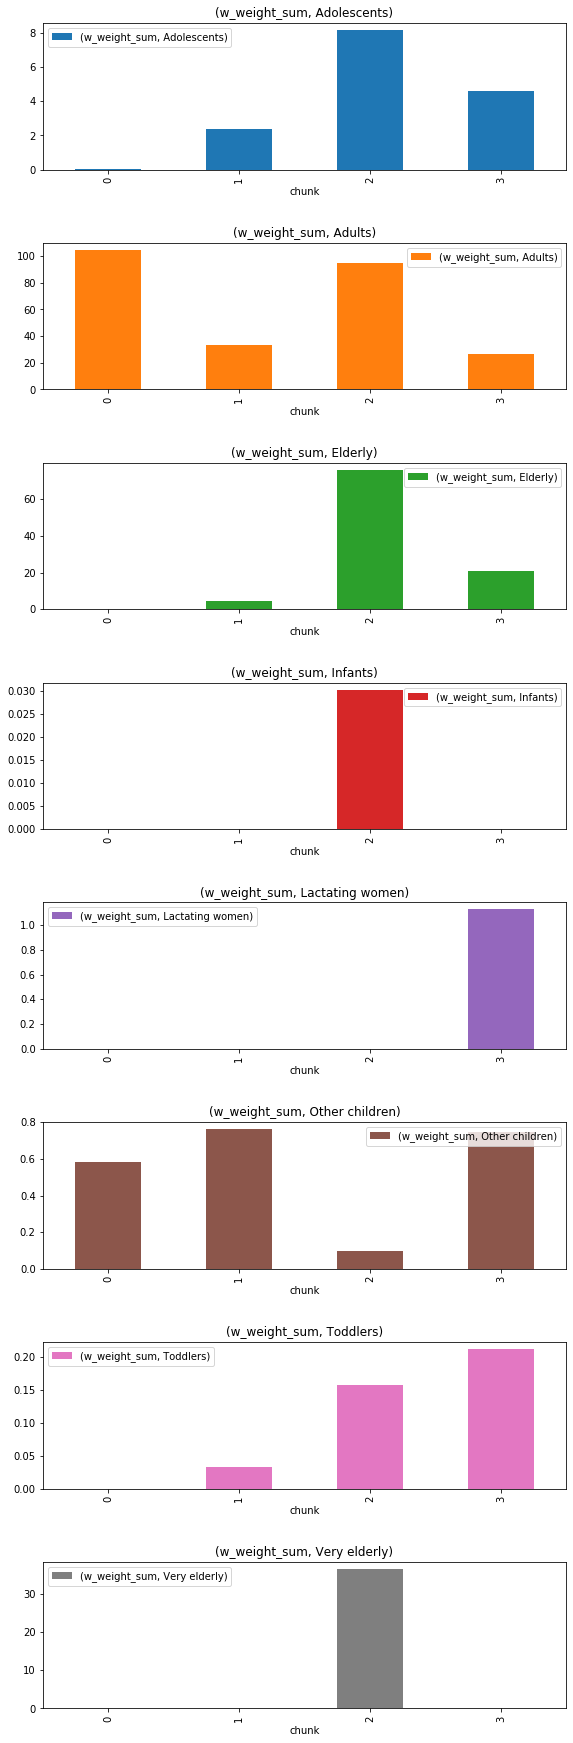

In [136]:
fig, axes = plt.subplots(8,1, figsize=(8,24))
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)


df_alcohol_best_g.unstack(level=1).plot(kind='bar', subplots=True, ax=axes[0])

Not very meaningful, let's try with only two chunks

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015DC7297488>,
      dtype=object)

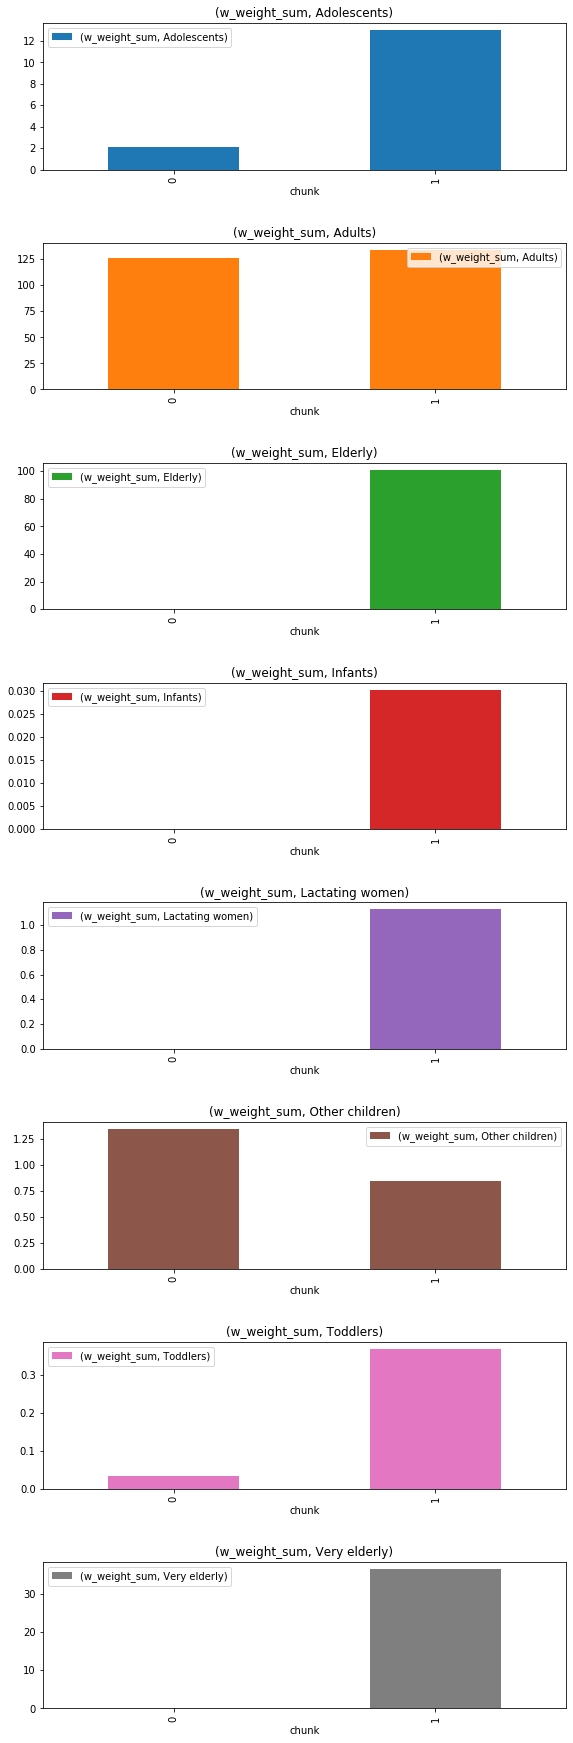

In [138]:
df_surveys_chunks = df = pd.read_csv(r"ESFA/surveys_chunks_2.csv", index_col=0)
df_alcohol = df_sel[df_sel["food_type_L1"] == "Alcoholic beverages"].copy()

df_alcohol_best = df_alcohol.merge(df_surveys_chunks[["Survey","chunk"]], left_on="survey_desc", right_on="Survey", how="inner")
df_alcohol_best["weight"] = df_alcohol_best["mean_weight"] * df_alcohol_best["cons_count"]
df_alcohol_best["w_weight"] = df_alcohol_best["weight"] / df_alcohol_best["pop_count"]

df_alcohol_best_g = (
    df_alcohol_best
    [["chunk","pop_group","w_weight"]]
    .groupby(["chunk","pop_group"])
    .sum()
    .rename(columns={"w_weight":"w_weight_sum"})
)

fig, axes = plt.subplots(8,1, figsize=(8,24))
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)


df_alcohol_best_g.unstack(level=1).plot(kind='bar', subplots=True, ax=axes[0])

We see we probably don't have data for Elderly, Very Elderly, Infants and Lactating Women in the first chunk.

We can guess some trends with such data, but we realize it's probably not enough?